# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
api_key = os.getenv('ALPACA_API_KEY')
secret_key = os.getenv('ALPACA_SECRET_KEY')
print(api_key)
print(secret_key)

PKEI02UL01HBI8TVZZJM
QIQjbWqFknRrzGl3YhLdILO1GUvbJTinfqmHJWIc


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
btc_data = requests.get(btc_url).json()

eth_data = requests.get(eth_url).json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19599456,
   'total_supply': 19599456,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 42951.0,
     'volume_24h': 25926008132,
     'market_cap': 845185387202,
     'percentage_change_1h': 0.56617342015498,
     'percentage_change_24h': 0.0898433551999324,
     'percentage_change_7d': -5.84257534319966,
     'percent_change_1h': 0.56617342015498,
     'percent_change_24h': 0.0898433551999324,
     'percent_change_7d': -5.84257534319966},
    'CAD': {'price': 58348.9335,
     'volume_24h': 35220482047.322,
     'market_cap': 1148184348513.92,
     'percent_change_1h': 0.56617342015498,
     'percent_change_24h': 0.0898433551999324,
     'percent_change_7d': -5.84257534319966}},
   'last_updated': 1705344904}},
 'metadata': {'timestamp': 1705344904,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [7]:
eth_cad_price = eth_data['data']['1027']['quotes']['CAD']['price']
eth_cad_price

3444.789205

In [8]:

# Fetch current BTC price
btc_cad_price = btc_data['data']['1']['quotes']['CAD']['price']
btc_cad_price

# Fetch current ETH price
eth_cad_price = eth_data['data']['1027']['quotes']['CAD']['price']
eth_cad_price

# Compute current value of my crpto

crpyto = btc_cad_price + eth_cad_price
crpyto

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_cad_price:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_cad_price:0.2f}")
print(f"The cuurent value of my crypto is ${crpyto:0.2f}")

The current value of your 1.2 BTC is $58348.93
The current value of your 5.3 ETH is $3444.79
The cuurent value of my crypto is $61793.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

# api = tradeapi.REST(
#     alpaca_api_key,
#     alpaca_secret_key,
#     api_version = "v2"
# )

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [11]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-08-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
closing_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=current_date,
    end=closing_date
).df
df_ticker.tail()
# Reorganize the DataFrame
# Separate ticker data

AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames

df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
# Preview DataFrame
df_ticker.head()

AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2020-08-03 04:00:00+00:00  119.40  119.40  119.1903       36360  119.37   
2020-08-04 04:00:00+00:00  119.63  119.63  119.4200       39114  119.42   
2020-08-05 04:00:00+00:00  119.40  119.49  119.3100       42315  119.39   
2020-08-06 04:00:00+00:00  119.57  119.73  119.5300       15939  119.62   
2020-08-07 04:00:00+00:00  119.43  119.73  119.3950       15247  119.66   

                                                    SPY                  \
                             volume        vwap   close    high     low   
timestamp                                                                 
2020-08-03 04:00:00+00:00  13762068  119.288806  328.67  329.62  327.73   
2020-08-04 04:00:00+00:00  11196655  119.543730  330.00  330.06  327.86   
2020-08-05 04:00:00+00:00  17692185  119.387472  332.03  332.39  331.18   
2020-08-06 04:00:00+00:00   4764309  119.603083  334.32  334.46  331.13   
2020-08-07 04:00:00+00:00   6229081  119.470433  334.57  334.88  332.30   

                                                                       
                          trade_count      open    volume        vwap  
timestamp                                                              
2020-08-03 04:00:00+00:00      288006  328.3200  54271003  328.661676  
2020-08-04 04:00:00+00:00      250901  327.8600  42614516  329.073978  
2020-08-05 04:00:00+00:00      241419  331.4700  43668799  331.797459  
2020-08-06 04:00:00+00:00      290039  331.4799  44795942  332.974254  
2020-08-07 04:00:00+00:00      349308  333.2800  57978084  333.809718

In [12]:
# Pick AGG and SPY close prices

agg_close_price = float(df_ticker["AGG"]["close"][-1])
spy_close_price = float(df_ticker["SPY"]["close"][-1])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [13]:
# Compute the current value of shares
agg_current_price = float(df_ticker["AGG"]["close"][-1]) * my_agg
spy_current_price = float(df_ticker["SPY"]["close"][-1]) * my_spy


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_current_price:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_current_price:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data

consolidate = [btc_cad_price + eth_cad_price, agg_current_price + spy_current_price]
display(crpyto)


# Create savings DataFrame
df_savings = pd.DataFrame(consolidate, columns = ['amount'], index=['crypto','shares'])

# Display savings DataFrame
df_savings.head()

61793.722705

,amount
crypto,61793.722705
shares,40614.500000


array([<Axes: ylabel='amount'>], dtype=object)

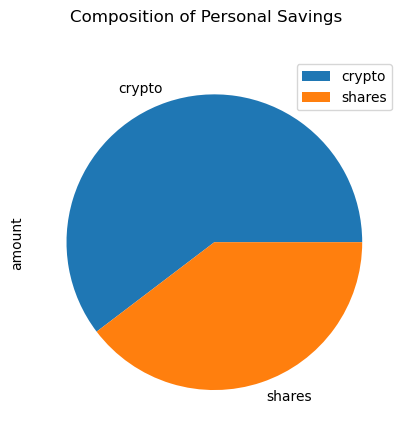

In [15]:
# Plot savings pie chart
df_savings.plot(kind ='pie', subplots=True, title = ('Composition of Personal Savings')) 

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (btc_cad_price + eth_cad_price + agg_current_price + spy_current_price)

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print(f"Congratulations! You reached your Financial Goal")
else:
    print(f"You need reached your Financial Goal")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2020-08-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-01-12', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
df_stock_data.head()
# # Set the ticker information
tickers = ["AGG", "SPY"]


# Reorganize the DataFrame

AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
#variables that you are concating you can put it in a single [list type]
#parameter - 3, df, axis, keys
#[AGG, SPY] = df created
#['AGG', 'SPY'] = refers the the data in ticker symbol
df_stock_data = pd.concat([AGG, SPY], axis = 1, keys = ['AGG', 'SPY'])


# Display sample data
df_stock_data.head()

AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2020-08-03 04:00:00+00:00  119.40  119.40  119.1903       36360  119.37   
2020-08-04 04:00:00+00:00  119.63  119.63  119.4200       39114  119.42   
2020-08-05 04:00:00+00:00  119.40  119.49  119.3100       42315  119.39   
2020-08-06 04:00:00+00:00  119.57  119.73  119.5300       15939  119.62   
2020-08-07 04:00:00+00:00  119.43  119.73  119.3950       15247  119.66   

                                                    SPY                  \
                             volume        vwap   close    high     low   
timestamp                                                                 
2020-08-03 04:00:00+00:00  13762068  119.288806  328.67  329.62  327.73   
2020-08-04 04:00:00+00:00  11196655  119.543730  330.00  330.06  327.86   
2020-08-05 04:00:00+00:00  17692185  119.387472  332.03  332.39  331.18   
2020-08-06 04:00:00+00:00   4764309  119.603083  334.32  334.46  331.13   
2020-08-07 04:00:00+00:00   6229081  119.470433  334.57  334.88  332.30   

                                                                       
                          trade_count      open    volume        vwap  
timestamp                                                              
2020-08-03 04:00:00+00:00      288006  328.3200  54271003  328.661676  
2020-08-04 04:00:00+00:00      250901  327.8600  42614516  329.073978  
2020-08-05 04:00:00+00:00      241419  331.4700  43668799  331.797459  
2020-08-06 04:00:00+00:00      290039  331.4799  44795942  332.974254  
2020-08-07 04:00:00+00:00      349308  333.2800  57978084  333.809718

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(portfolio_data = df_stock_data, 
                    weights = [.40,.60],
                    num_simulation = 500,
                    num_trading_days=252 * 30)
 
    


In [20]:
# Printing the simulation input data
MC_30.portfolio_data.head() 


AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2020-08-03 04:00:00+00:00  119.40  119.40  119.1903       36360  119.37   
2020-08-04 04:00:00+00:00  119.63  119.63  119.4200       39114  119.42   
2020-08-05 04:00:00+00:00  119.40  119.49  119.3100       42315  119.39   
2020-08-06 04:00:00+00:00  119.57  119.73  119.5300       15939  119.62   
2020-08-07 04:00:00+00:00  119.43  119.73  119.3950       15247  119.66   

                                                                 SPY          \
                             volume        vwap daily_return   close    high   
timestamp                                                                      
2020-08-03 04:00:00+00:00  13762068  119.288806          NaN  328.67  329.62   
2020-08-04 04:00:00+00:00  11196655  119.543730     0.001926  330.00  330.06   
2020-08-05 04:00:00+00:00  17692185  119.387472    -0.001923  332.03  332.39   
2020-08-06 04:00:00+00:00   4764309  119.603083     0.001424  334.32  334.46   
2020-08-07 04:00:00+00:00   6229081  119.470433    -0.001171  334.57  334.88   

                                                                               \
                              low trade_count      open    volume        vwap   
timestamp                                                                       
2020-08-03 04:00:00+00:00  327.73      288006  328.3200  54271003  328.661676   
2020-08-04 04:00:00+00:00  327.86      250901  327.8600  42614516  329.073978   
2020-08-05 04:00:00+00:00  331.18      241419  331.4700  43668799  331.797459   
2020-08-06 04:00:00+00:00  331.13      290039  331.4799  44795942  332.974254   
2020-08-07 04:00:00+00:00  332.30      349308  333.2800  57978084  333.809718   

                                        
                          daily_return  
timestamp                               
2020-08-03 04:00:00+00:00          NaN  
2020-08-04 04:00:00+00:00     0.004047  
2020-08-05 04:00:00+00:00     0.006152  
2020-08-06 04:00:00+00:00     0.006897  
2020-08-07 04:00:00+00:00     0.000748

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return() 


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995932,0.998845,0.999279,0.996081,1.005807,1.000594,0.990287,0.996245,1.000158,1.004443,...,1.002476,0.995632,0.993756,0.989666,1.002607,1.014134,1.007950,1.006723,1.002148,0.993939
2,0.995941,1.001200,1.009022,0.999070,1.002545,1.007587,1.005184,0.985788,1.003167,1.005059,...,0.997284,0.998670,0.990885,0.986153,0.993115,1.014520,1.014787,1.000854,0.995385,0.994461
3,0.997940,1.007466,1.006901,1.002467,0.996044,1.000700,1.001968,0.982083,1.016151,1.000846,...,1.004151,0.994092,0.981113,0.981230,0.984915,1.012928,1.021592,0.994721,1.000514,0.992150
4,1.007548,1.005104,1.013128,1.001255,0.981476,1.004245,1.012125,0.986202,1.027033,1.007464,...,1.013321,0.999501,0.978887,0.980388,0.989160,1.015543,1.027519,0.995989,1.008155,0.989138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.224311,3.111077,3.773228,1.922067,7.760255,4.579126,8.839546,10.671313,2.497359,3.376534,...,6.585971,2.162328,2.095129,3.403344,3.208633,4.263964,4.887738,3.286827,2.285111,2.688747
7557,4.247665,3.088141,3.765628,1.918323,7.731037,4.565953,8.892127,10.739015,2.459558,3.340438,...,6.587144,2.184512,2.083716,3.381754,3.193312,4.288269,4.942777,3.303608,2.291762,2.690971
7558,4.284453,3.083664,3.757138,1.927381,7.677608,4.577902,8.992542,10.763393,2.454685,3.335810,...,6.640244,2.182456,2.084046,3.389963,3.190805,4.259349,4.926778,3.330073,2.270149,2.665254
7559,4.310617,3.083123,3.757111,1.938922,7.780853,4.545047,8.973693,10.885153,2.459347,3.317171,...,6.575051,2.183580,2.059880,3.397731,3.192948,4.218510,4.900950,3.323223,2.282327,2.671053


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

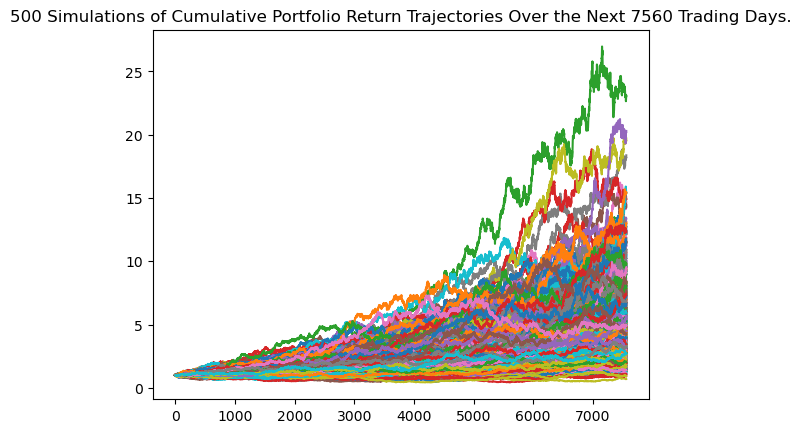

In [22]:
# Plot simulation outcomes
MC_30.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

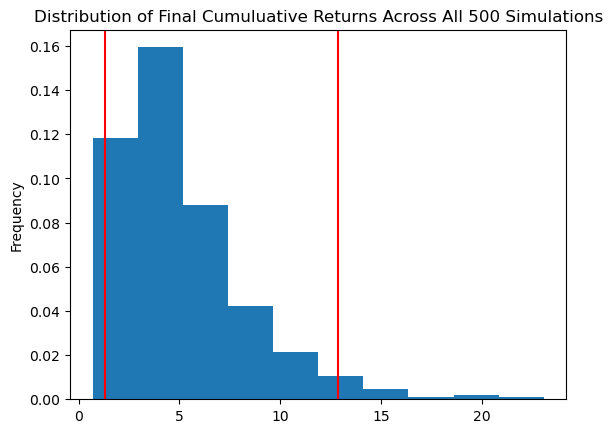

In [23]:
# Plot probability distribution and confidence intervals
MC_30.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30_sum = MC_30.summarize_cumulative_return()

# Print summary statistics
print(MC_30_sum)

count           500.000000
mean              5.069725
std               3.171102
min               0.707229
25%               2.831735
50%               4.220302
75%               6.334979
max              23.045403
95% CI Lower      1.325884
95% CI Upper     12.850318
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_30_sum[8] * initial_investment,2)
ci_upper = round(MC_30_sum[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
     f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $26517.68 and $257006.37


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_30_sum[8] * initial_investment,2)
ci_upper = round(MC_30_sum[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $39776.52 and $385509.55


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5 = MCSimulation(portfolio_data = df_stock_data, 
                    weights = [.40,.60],
                    num_simulation = 500,
                    num_trading_days=252 * 5)

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996639,0.990173,1.007179,1.007108,1.005082,1.004293,1.010034,1.012171,1.012427,1.012651,...,1.003132,1.008479,1.010766,0.995462,0.998128,0.997853,1.007286,1.000726,0.997555,0.993593
2,0.994820,0.998611,1.008364,1.008051,1.007051,1.004795,1.011262,1.018288,1.022821,1.009768,...,1.000944,1.019582,1.015627,0.983979,0.991049,0.993839,1.013832,1.002646,1.013611,0.988755
3,0.989910,1.005985,1.018877,1.006658,1.009468,1.013994,0.995471,1.011184,1.029352,1.018763,...,0.999701,1.020034,1.015185,0.994773,0.989328,0.996553,0.996580,0.993996,1.013437,0.996639
4,0.996951,1.000849,1.022307,1.005298,1.009018,1.025071,1.006100,1.004682,1.022209,1.011723,...,1.005007,1.014594,1.011649,0.996779,0.981824,1.000107,0.991411,0.995803,1.025876,1.002628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.706169,1.616588,1.288865,1.587832,2.177034,1.141084,0.893747,1.460382,1.176416,0.889731,...,1.243791,1.676980,1.611307,1.030972,0.813689,1.466338,1.075023,1.567257,1.221531,1.475299
1257,1.730634,1.608173,1.279128,1.582434,2.181378,1.130108,0.888649,1.453391,1.171799,0.900369,...,1.243252,1.683906,1.616462,1.031895,0.813258,1.456548,1.069060,1.570821,1.218894,1.460393
1258,1.746133,1.613861,1.284498,1.568333,2.203783,1.128698,0.885091,1.458325,1.169519,0.912045,...,1.258524,1.672490,1.619999,1.033562,0.813386,1.452428,1.078052,1.543268,1.219923,1.458414
1259,1.760521,1.629815,1.282805,1.554222,2.202259,1.141263,0.888788,1.461022,1.157701,0.913122,...,1.253405,1.674474,1.627762,1.038401,0.819323,1.463329,1.066741,1.530331,1.228110,1.468020


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

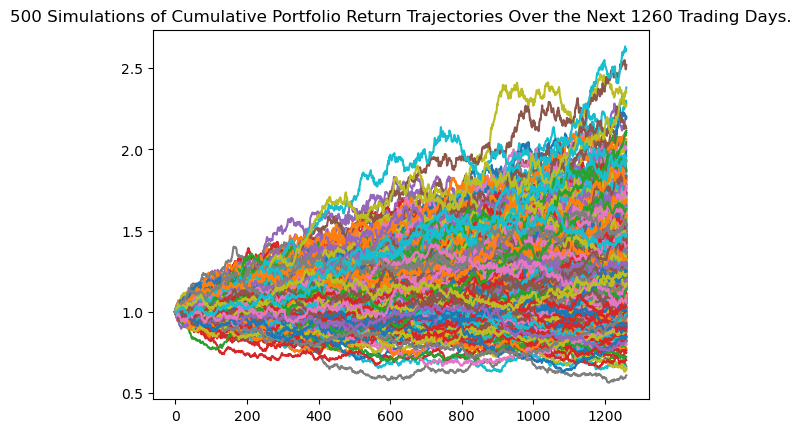

In [29]:
# Plot simulation outcomes
MC_5.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

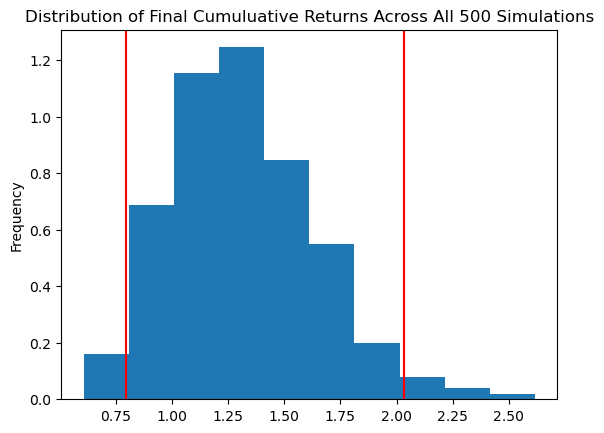

In [30]:
# Plot probability distribution and confidence intervals
MC_5.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5_sum = MC_5.summarize_cumulative_return()

# Print summary statistics
print(MC_5_sum)



count           500.000000
mean              1.314078
std               0.338672
min               0.612105
25%               1.062905
50%               1.248141
75%               1.515548
max               2.517995
95% CI Lower      0.795768
95% CI Upper      2.062450
Name: 1260, dtype: float64


In [42]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_5_sum[8] * initial_investment,2)
ci_upper_five = round(MC_5_sum[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $15915.37 and $41249.0


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10 = MCSimulation(portfolio_data = df_stock_data, 
                    weights = [.40,.60],
                    num_simulation = 500,
                    num_trading_days=252 * 10)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004935,1.001038,1.012716,1.010305,0.990353,1.005544,1.002085,0.993159,0.996512,1.006595,...,0.994046,0.989496,0.994388,1.002798,0.998479,0.989642,0.997706,1.000935,0.996863,1.012333
2,1.006181,0.995583,1.018806,1.007313,0.989953,0.998033,0.995293,0.999484,0.987690,1.005630,...,0.993380,0.989095,1.005875,1.009215,1.009571,0.973697,0.996807,1.002064,0.990329,1.015054
3,0.999047,0.993315,1.009148,1.002380,0.984317,1.008556,0.992287,1.013188,0.979255,1.007258,...,0.997921,0.981667,0.994065,1.016474,1.014477,0.974879,0.999196,1.012453,1.007551,1.012323
4,0.996015,0.988608,1.005581,1.002075,0.991541,1.022223,0.997645,1.010594,0.967482,0.992469,...,0.992803,0.981735,1.000444,1.015599,0.997019,0.979800,1.005666,1.012907,1.007490,1.009844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.843505,1.216363,0.976457,1.041862,1.549165,1.538003,1.471354,1.661576,1.032569,1.925142,...,1.477381,2.189116,2.008583,2.186884,1.197031,1.126140,0.732154,2.518360,1.295788,1.189617
2517,0.844833,1.210645,0.965686,1.036680,1.537927,1.535052,1.484827,1.665249,1.035693,1.910445,...,1.469856,2.169580,2.010783,2.164153,1.181926,1.128611,0.723566,2.546544,1.298078,1.200667
2518,0.841102,1.219282,0.959628,1.045588,1.543233,1.529758,1.496902,1.661552,1.035896,1.937229,...,1.474224,2.166513,2.007173,2.156197,1.190700,1.130338,0.728533,2.553443,1.307557,1.221929
2519,0.843464,1.211907,0.958249,1.035176,1.539453,1.537031,1.488903,1.657514,1.024277,1.961445,...,1.478229,2.179495,2.009410,2.160837,1.185739,1.111287,0.732363,2.511308,1.317427,1.214499


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

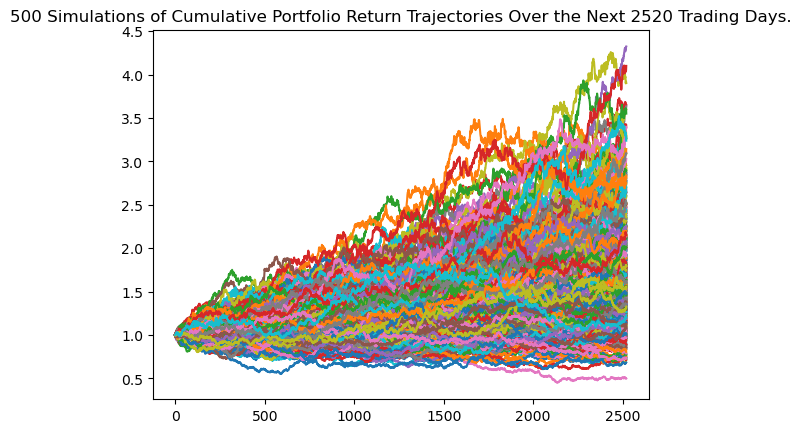

In [34]:
# Plot simulation outcomes
MC_10.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

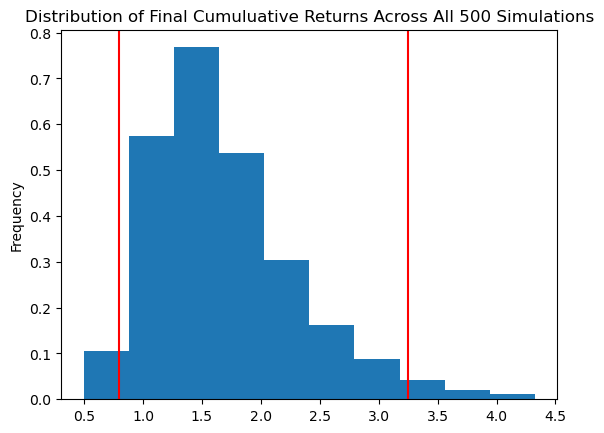

In [35]:
# Plot probability distribution and confidence intervals
MC_10.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10_sum = MC_10.summarize_cumulative_return()

# Print summary statistics
print(MC_10_sum)

count           500.000000
mean              1.688094
std               0.612661
min               0.497993
25%               1.249036
50%               1.577448
75%               2.012478
max               4.325481
95% CI Lower      0.796071
95% CI Upper      3.252193
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_10_sum[8] * initial_investment,2)
ci_upper_ten = round(MC_10_sum[9]] * initial_investment,2)2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $0.8 and $3.25
